In [1]:
# Import packages

# numpy version 1.22.3
import numpy as np

# pandas 1.2.4
import pandas as pd

# xgboost 1.5.2
import xgboost as xgb

# sklearn 1.0.2
from sklearn.model_selection import train_test_split
import joblib
import os

In [147]:
# Save excel as CSV and import data
df = pd.read_csv("C:/Users/austin27x/Documents/Data/Austin/NET for Python.csv")
df

,Team,Overall Seed,Wins,Losses,Q1 Wins,Q1 Losses,Q2 Wins,Q2 Losses,Q3 Wins,Q3 Losses,...,Net,RankAvg,QualityAvg,QualityNETAvg,Q1 Win%,Q2Win%,Q3Win%,Q4Win%,%ofGamesinQ1,AvgNetofConf
0,Virginia,2,29,3,12,3,4,0,6,0,...,1,1.5,1.333333,1.25,0.80,1.00,1.00,1.00,0.468750,62.87
1,Gonzaga,4,30,3,4,3,6,0,9,0,...,2,11.0,3.000000,2.75,0.57,1.00,1.00,1.00,0.212121,131.60
2,Duke,1,29,5,11,4,6,1,7,0,...,3,1.5,2.333333,2.50,0.73,0.86,1.00,1.00,0.441176,62.87
3,Houston,9,31,3,6,3,10,0,5,0,...,4,10.0,14.000000,11.50,0.67,1.00,1.00,1.00,0.264706,98.83
4,Tennessee,5,29,5,9,5,6,0,8,0,...,5,8.0,7.000000,6.50,0.64,1.00,1.00,1.00,0.411765,55.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,BYU,54,20,10,4,6,3,3,3,0,...,54,99.0,61.000000,59.25,0.40,0.50,1.00,0.91,0.333333,134.30
104,Creighton,33,22,11,7,6,4,4,6,1,...,55,55.5,55.333333,55.25,0.54,0.50,0.86,1.00,0.393939,65.09
105,Dayton,48,23,10,3,2,5,4,6,1,...,58,104.0,55.333333,56.00,0.60,0.56,0.86,0.75,0.151515,136.50
106,Miami (Fl),38,23,10,4,3,5,4,9,3,...,62,71.0,61.333333,61.50,0.57,0.56,0.75,1.00,0.212121,93.40


In [29]:
# Look for null data - get rid of null by editing excel file
df.isnull().sum()

Team             0
Overall Seed     0
Wins             0
Losses           0
Q1 Wins          0
Q1 Losses        0
Q2 Wins          0
Q2 Losses        0
Q3 Wins          0
Q3 Losses        0
Q4 Wins          0
Q4 Losses        0
KPI              0
SOS              0
SOR              0
BPI              0
Kenpom           0
Sagarin          0
Net              0
RankAvg          0
QualityNETAvg    0
Q1 Win%          0
Q2Win%           0
Q3Win%           0
Q4Win%           0
%ofGamesinQ1     0
AvgNetofConf     0
dtype: int64

<AxesSubplot:xlabel='Net', ylabel='Overall Seed'>

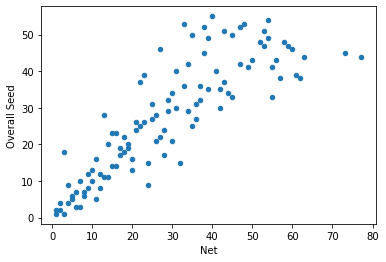

In [30]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'Net', y = 'Overall Seed')

<AxesSubplot:xlabel='RankAvg', ylabel='Overall Seed'>

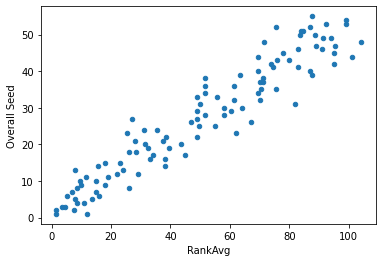

In [31]:
%matplotlib inline
df.plot(kind = 'scatter', x= 'RankAvg', y = 'Overall Seed')

<AxesSubplot:xlabel='QualityNETAvg', ylabel='Overall Seed'>

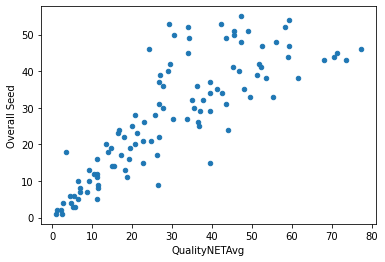

In [32]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'QualityNETAvg', y = 'Overall Seed')

In [180]:
# Prepare lists of attributes, features, and targets

# Don't model on
attributes = [

]

features = [
'Q1 Win%',
'Q2Win%',
'Q3Win%',
'Q4Win%',
'QualityNETAvg',
'RankAvg',
'AvgNetofConf'

]

target = ['Overall Seed']

In [181]:
features

['Q1 Win%',
 'Q2Win%',
 'Q3Win%',
 'Q4Win%',
 'QualityNETAvg',
 'RankAvg',
 'AvgNetofConf']

In [182]:
# Split the df into a copy of features and targets
X = df[features].copy()
y = df[target].copy()

In [183]:
X

,Q1 Win%,Q2Win%,Q3Win%,Q4Win%,QualityNETAvg,RankAvg,AvgNetofConf
0,0.80,1.00,1.00,1.00,1.25,1.5,62.87
1,0.57,1.00,1.00,1.00,2.75,11.0,131.60
2,0.73,0.86,1.00,1.00,2.50,1.5,62.87
3,0.67,1.00,1.00,1.00,11.50,10.0,98.83
4,0.64,1.00,1.00,1.00,6.50,8.0,55.14
...,...,...,...,...,...,...,...
103,0.40,0.50,1.00,0.91,59.25,99.0,134.30
104,0.54,0.50,0.86,1.00,55.25,55.5,65.09
105,0.60,0.56,0.86,0.75,56.00,104.0,136.50
106,0.57,0.56,0.75,1.00,61.50,71.0,93.40


In [184]:
y

,Overall Seed
0,2
1,4
2,1
3,9
4,5
...,...
103,54
104,33
105,48
106,38


In [185]:
# Split df into train and test
RANDOMSTATE=22
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=RANDOMSTATE)

In [186]:
# Testing 80% of the model while keeping 20% of it the same
xtrain

,Q1 Win%,Q2Win%,Q3Win%,Q4Win%,QualityNETAvg,RankAvg,AvgNetofConf
68,0.33,0.83,1.00,1.00,16.50,62.0,37.00
26,0.43,0.86,0.83,1.00,26.75,38.5,48.79
76,0.75,0.78,0.67,1.00,26.50,18.0,56.71
72,0.54,0.83,0.86,1.00,19.25,33.0,63.57
105,0.60,0.56,0.86,0.75,56.00,104.0,136.50
...,...,...,...,...,...,...,...
102,0.20,0.67,0.92,1.00,52.50,95.5,93.40
100,0.53,0.20,1.00,1.00,52.25,74.5,37.00
64,0.75,0.67,0.89,1.00,11.50,26.0,93.40
44,0.40,0.25,1.00,1.00,43.50,91.5,48.79


In [187]:
xtest

,Q1 Win%,Q2Win%,Q3Win%,Q4Win%,QualityNETAvg,RankAvg,AvgNetofConf
2,0.73,0.86,1.00,1.00,2.50,1.5,62.87
50,0.33,0.78,0.80,1.00,51.25,63.5,48.79
35,0.29,0.75,0.90,1.00,36.25,51.5,42.60
89,0.46,0.50,1.00,1.00,35.00,61.5,65.09
83,0.27,1.00,1.00,0.83,27.75,58.0,93.40
12,0.43,1.00,1.00,1.00,20.75,51.5,171.10
49,0.25,1.00,1.00,1.00,77.25,91.0,171.10
46,0.25,0.75,0.88,1.00,68.00,76.0,98.83
107,0.50,0.43,0.67,0.83,70.50,101.0,56.71
33,0.09,0.67,1.00,1.00,30.50,88.5,62.87


In [188]:
ytrain

,Overall Seed
68,23
26,22
76,9
72,16
105,48
...,...
102,47
100,41
64,8
44,49


In [189]:
ytest

,Overall Seed
2,1
50,39
35,36
89,32
83,30
12,28
49,46
46,43
107,44
33,50


In [190]:
# Load model and create and save output
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [191]:
model.intercept_

array([52.58767685])

In [192]:
model.coef_

array([[-1.63579584e+01, -9.93981809e+00, -5.57986571e+00,
        -2.58934375e+01,  2.04660732e-01,  2.80862342e-01,
         1.48272234e-03]])

In [193]:
model.score(xtest,ytest)

0.8666759359730358

In [194]:
y_pred = model.predict(xtest)

In [195]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,y_pred)

4.455595193925545

In [60]:
# Combine the xtest df with an attribute_df and target_df
attribute_df = df[attributes].copy()
target_df = df[target].copy()
pred_df = xtest.join(attribute_df)
pred_df = pred_df.join(target_df)

In [43]:
# Create a new column in the df with predicted values
pred_df['SeedPredicted'] = model.predict(xtest)

In [44]:
# Save df as a CSV
pred_df.to_csv("C:/Users/austin27x/Documents/Data/Austin/SeedPredicted1.csv")

In [142]:
# FUTURE DATA
new_df = pd.read_csv("C:/Users/austin27x/Documents/Data/Austin/NET 22-23 for Python.csv")
new_df

,Team,Overall Seed,Net,Record,Wins,Losses,Q1 Wins,Q1 Losses,Q1 Win%,Q2 Wins,...,KPI,KPIRank,SOS,SOR,RankAvg,BPI,Kenpom,Sagarin,QualityAvg,QualityNETAvg
0,Alabama,1,2,29-5,29,5,13,5,0.722222,6,...,0.489,1,0.198,1,1.0,2,3,1,2.000000,2.00
1,Houston,2,1,31-3,31,3,7,2,0.777778,8,...,0.374,5,0.072,6,5.5,1,1,2,1.333333,1.25
2,Kansas,3,9,27-7,27,7,17,7,0.708333,4,...,0.452,2,0.229,2,2.0,10,9,7,8.666667,8.75
3,Purdue,4,5,29-5,29,5,10,4,0.714286,9,...,0.406,3,0.152,3,3.0,7,7,10,8.000000,7.25
4,UCLA,5,3,29-5,29,5,8,5,0.615385,9,...,0.348,8,0.112,5,6.5,4,2,3,3.000000,3.00
5,Texas,6,7,26-8,26,8,14,8,0.636364,4,...,0.384,4,0.183,4,4.0,5,6,5,5.333333,5.75
6,Arizona,7,10,28-6,28,6,9,2,0.818182,7,...,0.346,9,0.103,8,8.5,9,10,8,9.000000,9.25
7,Marquette,8,12,28-6,28,6,8,5,0.615385,6,...,0.309,16,0.102,7,11.5,13,12,12,12.333333,12.25
8,Baylor,9,15,22-10,22,10,11,10,0.523810,4,...,0.340,10,0.198,10,10.0,12,15,13,13.333333,13.75
9,Gonzaga,10,6,27-5,27,5,6,4,0.600000,5,...,0.352,7,0.096,9,8.0,8,8,4,6.666667,6.50


In [143]:
new_df = new_df[features].copy()
new_df

,Q1 Win%,QualityNETAvg,RankAvg,AvgNetofConf,%ofGamesinQ1
0,0.722222,2.00,1.0,71.36,0.529412
1,0.777778,1.25,5.5,126.18,0.264706
2,0.708333,8.75,2.0,30.20,0.705882
3,0.714286,7.25,3.0,57.57,0.411765
4,0.615385,3.00,6.5,95.92,0.382353
5,0.636364,5.75,4.0,30.20,0.647059
6,0.818182,9.25,8.5,95.92,0.323529
7,0.615385,12.25,11.5,82.00,0.382353
8,0.523810,13.75,10.0,30.20,0.656250
9,0.600000,6.50,8.0,118.60,0.312500


In [63]:
new_pred_df = model.predict(new_df)
new_pred_df

array([[ 0.15646537],
       [ 1.13684094],
       [ 1.98495268],
       [ 2.89601904],
       [ 3.68992978],
       [ 3.10997247],
       [ 5.82791514],
       [ 7.76383744],
       [ 8.27358787],
       [ 5.73280997],
       [13.66002243],
       [14.80352048],
       [10.74571638],
       [14.20128347],
       [17.82005745],
       [16.295347  ],
       [11.58115246],
       [13.05061126],
       [16.8294682 ],
       [20.88305502],
       [20.81867802],
       [23.11710911],
       [23.07807182],
       [20.81543907],
       [19.13403192],
       [24.30495   ],
       [21.59660968],
       [25.21215941],
       [15.82083191],
       [23.686535  ],
       [25.74617985],
       [35.16147762],
       [16.56169188],
       [20.63174024],
       [24.22540288],
       [27.56476054],
       [25.27208636],
       [27.19758684],
       [31.82570783],
       [37.50515174],
       [33.34216131],
       [34.36489935],
       [33.35276324],
       [40.88353034],
       [39.67883462],
       [33

In [21]:
new_pred_df = pd.DataFrame(new_pred_df)
new_pred_df.to_csv("C:/Users/austin27x/Documents/Data/March Madness/PointsScoredPredictedGameStats2.csv")